# Análisis de Estilo en Portafolios

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.picpedia.org/finance/images/stock-portfolio.jpg" width="400px" height="400px" />

> Al analizar si invertir o no en un portafolio (fondo de inversión), nos podríamos preguntar qué tan bueno es el administrador de dicho fondo.

> Bien, esto nos lleva a preguntarnos cómo es que se conforma un portafolio, cuál es el proceso mediante el cual se seleccionan los activos.

> Se puede consultar que los portafolios se venden con ciertas tendencias claramente marcadas (portafolios de compañías de alta capitalización, portafolios de compañías de baja capitalización, portafolios de compañías con baja diferencia de valor en libros y valor bursátil, ...).

> Entonces, surgen dos preguntas:
> 1. ¿Presenta en realidad el portafolio un comportamiento acorde al estilo que se promete?
> 2. Si los activos que conforman el portafolio pertenecen a un grupo selecto, ¿qué tan bueno es el administrador escogiendo dichos activos?

**Objetivos**

- Descomponer el exceso de rendimientos de un portafolio, en los *rendimientos debidos al estilo* y los *rendimientos debidos a la selección*.

- *rendimiento debido a la selección* = resta entre rendimiento del portafolio, y una mezcla pasiva de estilos similares.

**Solo el rendimiento debido a la selección se le puede atribuir al talento del administrador.**
___

## 1. Fundamentos básicos

- El análisis de estilo es una técnica poderosa y sofisticada para medir qué tan bueno es un administrador de fondos.

- Describe qué tan bueno es un administrador, analizando estadísticamente cómo los rendimientos del portafolio actúan, contra los rendimientos de lo que incluye el portafolio.

- En realidad nos interesa poco qué activos individuales contiene el portafolio. Más bien, miramos cómo se relaciona a diferentes estilos de inversión.

- Pero, ¿qué es un estilo de inversión?
 - Se puede pensar como un índice (método de inversión pasiva), o un *benchmark* (inversión base para comparar).
 
- Podemos pensar como si partiéramos el mercado en una matriz tres por tres, basados en la capitalización y en la diferencia entre valor en libros y valor de mercado.

|                                |                                |                               |
| ------------------------------ | ------------------------------ | ----------------------------- |
| Alta capitalización, Alta BM   | Alta Capitalización, Medio BM  | Alta Capitalización, Bajo BM  |
| Media capitalización, Alta BM  | Media Capitalización, Medio BM | Media Capitalización, Bajo BM |
| Baja capitalización, Alta BM   | Baja Capitalización, Medio BM  | Baja Capitalización, Bajo BM  |

- Entonces, por ejemplo, un administrador de fondos que invierte mayormente en activos de baja capitalización, diríamos que sigue un *estilo de baja capitalización*.

- Cabe destacar que estos no son los únicos estilos de inversión: también hay *estilo de bonos de gobierno*, por ejemplo.

Entonces, el análisis de estilo puede ser usado en varias formas:

1. Demostrar que un fondo de inversión sigue el objetivo que se plantea (si es de baja capitalización, etc)

2. Para descubrir cuál es el verdadero estilo de inversión del portafolio.

3. Evaluar que tan bueno es el administrador del fondo seleccionando los activos adecuados dentro del estilo prometido (valuación).

## 2. ¿Cómo se hace?

- Para explorar el funcionamiento del análisis de estilo, analizaremos el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**.

- También necesitaremos los índices que marcan los diferentes estilos de inversión. Para ello usaremos las esquinas RUSSELL:
 - Russell 1000 Growth (^RLG)
 - Russell 1000 Value (^RLV)
 - Russell 2000 Growth (^RUO)
 - Russell 2000 Value (^RUJ)

Descarguemos datos diarios en los últimos 5 años.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
# Nombres de instrumentos que vamos a importar
tickers = ['VSMAX', '^RLG', '^RLV', '^RUO', '^RUJ']
# Fechas de inicio y fin
start_date = '2015-01-01'

In [5]:
# Descargamos datos
closes = get_adj_closes(tickers, start_date)

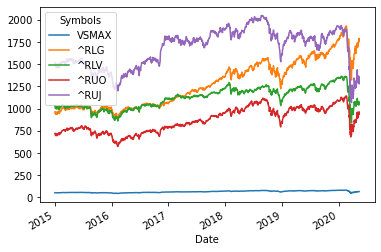

In [6]:
# Graficamos
closes.plot();

Obtenemos rendimientos

In [7]:
# Rendimientos diarios
ret = closes.pct_change().dropna()

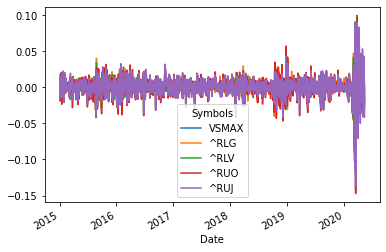

In [8]:
# Graficamos
ret.plot();

El análisis de estilo no es más que una regresión lineal de los (excesos de) rendimientos del portafolio que se va a analizar (*variable dependiente*), respecto a los diferentes estilos de inversión (*variables independientes o explicativas*).

1. De forma que se asignan pesos (o ponderaciones) a cada uno de los estilos elegidos y una ponderación adicional como intercepto <font color=blue> (ver en el tablero)</font>.

 $$r_{p,t}=\alpha+w_1I_{1,t}+w_2I_{2,t}+\dots+w_nI_{n,t}+\epsilon_t,$$
 
 donde $\epsilon_t$ es el término de error (residual). Se incluye la restricción de que dichos pesos deben sumar uno (1), para interpretarlos como porcentajes:
 
 $$w_1+w_2+\dots+w_n=1.$$

2. Se calculan los residuales (error) al cuadrado en cada paso, y se minimiza el total: **mínimos cuadrados**.
 
 <font color=blue> (ver en el tablero)</font>.
 
 $$\min_{\alpha,w_1,\dots,w_n} \sum_{t=0}^T\epsilon_t^2=\sum_{t=0}^T\left(r_{p,t}-\alpha-w_1I_{1,t}-w_2I_{2,t}-\dots-w_nI_{n,t}\right)^2$$
 
 sujeto a $w_1+w_2+\dots+w_n=1.$

3. Calcular el estadístico $R$-cuadrado: en qué porcentaje la variación de los rendimientos de los índices explican la variación de los rendimientos del portafolio.

 $$R^2=1-\frac{var(\epsilon)}{var(r_p)}$$

Entonces, necesitamos un optimizador

In [9]:
# Importamos la librería optimize de scipy
from scipy.optimize import minimize

/home/intern/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/intern/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/intern/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
ret

Symbols,VSMAX,^RLG,^RLV,^RUO,^RUJ
Date,,,,,
2015-01-05,-0.016329,-0.017182,-0.018925,-0.013719,-0.015402
2015-01-06,-0.012587,-0.009282,-0.008620,-0.017893,-0.016018
2015-01-07,0.012193,0.012684,0.010574,0.015889,0.009313
2015-01-08,0.016244,0.018249,0.017138,0.019363,0.014875
2015-01-09,-0.008082,-0.007779,-0.008799,-0.006693,-0.010812
...,...,...,...,...,...
2020-05-06,-0.005162,0.001040,-0.016029,0.001280,-0.020477
2020-05-07,0.018323,0.012980,0.012241,0.015165,0.016568
2020-05-08,0.032006,0.013087,0.024035,0.031449,0.042908


Debemos escribir la función a optimizar

In [22]:
# Función a minimizar (residuales)
def sq_res(beta, rp, I):
    # beta[0]: alpha
    return ((rp - beta[0] - I.dot(beta[1:]))**2).sum()

Datos de entrada al optimizador

In [19]:
# Datos
beta0 = np.ones(5) / 5
rp = ret.iloc[:, 0].values
I = ret.iloc[:, 1:].values

Restricciones

In [20]:
# Restricciones
cons = {'type': 'eq', 'fun': lambda beta: beta[1:].sum() - 1}
bnds = ((None, None),) + ((0, None),) * 4

In [21]:
bnds

((None, None), (0, None), (0, None), (0, None), (0, None))

Resolvemos

In [23]:
# Resolvemos
resultado = minimize(fun=sq_res,
                     x0=beta0,
                     args=(rp, I),
                     bounds=bnds,
                     constraints=cons
                    )

In [24]:
resultado

     fun: 0.003832856627763972
     jac: array([-1.06723746e-07,  3.35469755e-03,  2.29378679e-03,  2.61118775e-03,
        3.37332874e-03])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([8.19114231e-05, 1.19398555e-01, 1.89553774e-01, 3.36757333e-01,
       3.54290338e-01])

In [25]:
resultado.x[1:].sum()

1.0000000000000002

In [26]:
alpha = resultado.x[0]
alpha

8.191142308551242e-05

In [28]:
b1, b2, b3, b4 = resultado.x[1:]
b1, b2, b3, b4

(0.11939855530316976,
 0.18955377363258194,
 0.33675733334852176,
 0.35429033771572666)

### ¿Qué podemos concluir?

Entonces, el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**, está conformado en un

In [29]:
# b_1
print(f'{b1 * 100} %')

11.939855530316976 %


por activos de alta capialización y con alta diferencia BM (Russell 1000 Growth); está conformado en un

In [30]:
# b_2
print(f'{b2 * 100} %')

18.955377363258194 %


por activos de alta capitalización con baja diferencia BM (Russell 1000 Value); está conformado en un

In [31]:
# b_3
print(f'{b3 * 100} %')

33.675733334852175 %


por activos de baja capitalización con alta diferencia BM (Russell 2000 Growth); y está conformado en un

In [32]:
# b_4
print(f'{b4 * 100} %')

35.42903377157266 %


por activos de baja capitalización con baja diferencia BM (Russell 2000 Value). El restante

In [33]:
# alpha
alpha

8.191142308551242e-05

de los rendimientos diarios, **es atribuible al administrador del fondo por la selección particular de los activos.**

Por tanto, **el estilo predominante del fondo es de baja capitalizacion** ($\approx 70\%$).

Calculamos el $R^2$

In [35]:
# Calculamos residuales (error)
error = rp - alpha - b1 * I[:, 0] - b2 * I[:, 1] - b3 * I[:, 2] - b4 * I[:, 3]

In [37]:
help(np.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t

In [38]:
# Calculamos Rsq
R2 = 1 - np.var(error) / np.var(rp)
R2

0.9835446299607785

Estadísticamente, el modelo propuesto explica el $98.35\%$ de la variación total de los rendimientos del portafolio.

Gráficamente

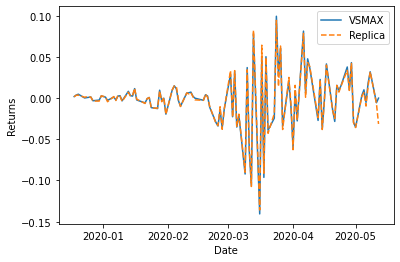

In [42]:
# Graficar los rendimientos del portafolio y los que se obtendrían con los índices
plt.figure(figsize=(6, 4))
plt.plot(ret.index[-100:], rp[-100:], label='VSMAX')
plt.plot(ret.index[-100:], (alpha + b1 * I[:, 0] + b2 * I[:, 1] + b3 * I[:, 2] + b4 * I[:, 3])[-100:], '--', label='Replica')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc='best')

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>